# LAB 9 Algoritmos de Gale-Shapley e Irving
#### Nicolas David Contreras Ramirez

In [124]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import sleep

In [72]:
def gustos(a):
    mat = []
    
    for i in range(a):
        mar = [i for i in range(a)]
        random.shuffle(mar)

        mat.append(mar)
#     print(mat)
    return mat

In [107]:
def gale_shapley(men, women):
    
    n = len(women)
    wl = np.empty([n,n])
    free = [i for i in range(n)]
    womat = [-1 for i in range(n)]
#     print(womat)
    iterar = 0

    for i in range(len(women)):
        for j,p in enumerate(women[i]):
            wl[i][p-1] = j
#             
    while free:
        man = free.pop(0)
        iterar = iterar + 1
        preferir = men[man][0] - 1
        if womat[preferir] == -1:
            womat[preferir] = man
        else:
            if wl[preferir][man] < wl[preferir][womat[preferir]]:
                free.append(womat[preferir])
                men[womat[preferir]].pop(0)
                womat[preferir] = man
            else:
                free.append(man)
                men[man].pop(0)

    return womat, iterar

In [116]:
a = int(input("Numero de niños: "))
men = gustos(a)
women = gustos(a)

print()
mat, iterar = gale_shapley(men, women)

for i in range(len(mat)):
    print("Hombre",mat[i]+1, "con Mujer", i+1)
print("\nEn", iterar, "iteraciones")


Numero de niños:  4



Hombre 4 con Mujer 1
Hombre 1 con Mujer 2
Hombre 2 con Mujer 3
Hombre 3 con Mujer 4

En 4 iteraciones


## Peor caso n=4

In [121]:
print("Peor caso")
a = int(input("Numero de niños + 1: "))
men = gustos(a)
women = gustos(a+1)
man = men[0][:]
random.shuffle(man)
men.append(man)
for i in range(len(men)):
    men[i].append(a+1)

print()
mat, iterar = gale_shapley(men, women)

for i in range(len(mat)):
    print("Hombre",mat[i]+1, "con Mujer", i+1)
print("\nEn", iterar, "iteraciones")

Peor caso


Numero de niños + 1:  3



Hombre 4 con Mujer 1
Hombre 3 con Mujer 2
Hombre 2 con Mujer 3
Hombre 1 con Mujer 4

En 9 iteraciones


In [123]:
a = int(input("Numero de niños: "))
men = gustos(a)
women = gustos(a)

print()
mat, iterar = gale_shapley(men, women)

for i in range(len(mat)):
    print("Hombre",mat[i]+1, "con Mujer", i+1)
print("\nEn", iterar, "iteraciones")

Numero de niños:  40



Hombre 33 con Mujer 1
Hombre 31 con Mujer 2
Hombre 16 con Mujer 3
Hombre 28 con Mujer 4
Hombre 38 con Mujer 5
Hombre 5 con Mujer 6
Hombre 10 con Mujer 7
Hombre 34 con Mujer 8
Hombre 27 con Mujer 9
Hombre 6 con Mujer 10
Hombre 1 con Mujer 11
Hombre 40 con Mujer 12
Hombre 20 con Mujer 13
Hombre 21 con Mujer 14
Hombre 39 con Mujer 15
Hombre 11 con Mujer 16
Hombre 13 con Mujer 17
Hombre 29 con Mujer 18
Hombre 36 con Mujer 19
Hombre 4 con Mujer 20
Hombre 8 con Mujer 21
Hombre 14 con Mujer 22
Hombre 30 con Mujer 23
Hombre 37 con Mujer 24
Hombre 26 con Mujer 25
Hombre 15 con Mujer 26
Hombre 17 con Mujer 27
Hombre 18 con Mujer 28
Hombre 32 con Mujer 29
Hombre 25 con Mujer 30
Hombre 23 con Mujer 31
Hombre 7 con Mujer 32
Hombre 35 con Mujer 33
Hombre 19 con Mujer 34
Hombre 2 con Mujer 35
Hombre 9 con Mujer 36
Hombre 3 con Mujer 37
Hombre 12 con Mujer 38
Hombre 22 con Mujer 39
Hombre 24 con Mujer 40

En 324 iteraciones


# PUNTO 2

100%|██████████| 100/100 [00:00<00:00, 4898.86it/s]

hola
hola
hola
Mínimas iteraciones: 4.0
Máximas iteraciones: 11.0
Iteraciones promedio: 6.65


(array([ 9., 18., 22.,  0., 21., 18.,  0.,  6.,  4.,  2.]),
 array([ 4. ,  4.7,  5.4,  6.1,  6.8,  7.5,  8.2,  8.9,  9.6, 10.3, 11. ]),
 <BarContainer object of 10 artists>)

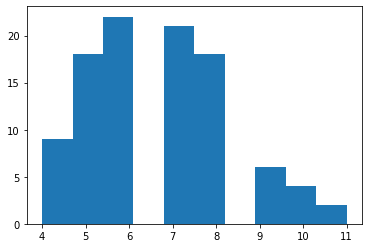

In [165]:
iteraciones = np.empty(100)
min_it = -1
max_it = -1
c=True
for i in tqdm(range(100)):

    men = gustos(4)
    women = gustos(4)

    mat, iteraciones[i] = gale_shapley(men, women)  

    if min_it == -1 and c:
        min_it = iteraciones[i]
        max_it = iteraciones[i]
        c=False
    
    if min_it > iteraciones[i] and c == False:
        print("hola")
        min_it = iteraciones[i]

    if max_it < iteraciones[i] and c == False:
        max_it = iteraciones[i]

print("Mínimas iteraciones:", min_it)
print("Máximas iteraciones:", max_it)
print("Iteraciones promedio:", iteraciones.mean())

plt.hist(iteraciones)

 28%|██▊       | 28/100 [00:00<00:00, 129.72it/s]

hola
hola


 62%|██████▏   | 62/100 [00:00<00:00, 144.61it/s]

hola
hola


100%|██████████| 100/100 [00:00<00:00, 159.80it/s]

Mínimas iteraciones: 80.0
Máximas iteraciones: 252.0
Iteraciones promedio: 149.04


(array([ 4., 11., 19., 18., 19., 13.,  9.,  3.,  2.,  2.]),
 array([ 80. ,  97.2, 114.4, 131.6, 148.8, 166. , 183.2, 200.4, 217.6,
        234.8, 252. ]),
 <BarContainer object of 10 artists>)

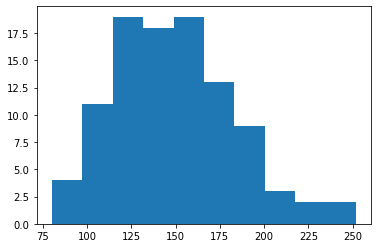

In [166]:
iteraciones = np.empty(100)
min_it = -1
max_it = -1
c=True
for i in tqdm(range(100)):

    men = gustos(40)
    women = gustos(40)

    mat, iteraciones[i] = gale_shapley(men, women)  

    if min_it == -1 and c:
        min_it = iteraciones[i]
        max_it = iteraciones[i]
        c=False
    
    if min_it > iteraciones[i] and c == False:
        print("hola")
        min_it = iteraciones[i]

    if max_it < iteraciones[i] and c == False:
        max_it = iteraciones[i]

print("Mínimas iteraciones:", min_it)
print("Máximas iteraciones:", max_it)
print("Iteraciones promedio:", iteraciones.mean())

plt.hist(iteraciones)